## HW2: Linear Discriminant Analysis

In [2]:
import numpy as np

## Load data

In [3]:
import pandas as pd

In [4]:
x_train = pd.read_csv("x_train.csv").values
y_train = pd.read_csv("y_train.csv").values[:,0]
x_test = pd.read_csv("x_test.csv").values
y_test = pd.read_csv("y_test.csv").values[:,0]

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 2)
(750,)
(250, 2)
(250,)


## 1. Compute the mean vectors mi, (i=1,2) of each 2 classes

In [6]:
c1 = x_train[np.where(y_train == 0)] # class1, y = 0
c2 = x_train[np.where(y_train == 1)] # class2, y = 1

In [7]:
m1 = np.mean(c1, axis=0).reshape(-1, 1) # transpose
m2 = np.mean(c2, axis=0).reshape(-1, 1) # transpose

In [8]:
print(f"mean vector of class 1 (y = 0):\n{m1}")
print(f"mean vector of class 2 (y = 1):\n{m2}")

mean vector of class 1 (y = 0):
[[2.47107265]
 [1.97913899]]
mean vector of class 2 (y = 1):
[[1.82380675]
 [3.03051876]]


## 2. Compute the Within-class scatter matrix SW

In [9]:
sw = np.add(np.cov(c1, rowvar=False), np.cov(c2, rowvar=False))

In [10]:
assert sw.shape == (2,2)
print(f"Within-class scatter matrix SW:\n{sw}")

Within-class scatter matrix SW:
[[ 0.37548675 -0.01411612]
 [-0.01411612  0.36914756]]


## 3.  Compute the Between-class scatter matrix SB

In [11]:
sb = np.dot((m2-m1), (m2-m1).T)

In [12]:
assert sb.shape == (2,2)
print(f"Between-class scatter matrix SB:\n{sb}")

Between-class scatter matrix SB:
[[ 0.41895314 -0.68052227]
 [-0.68052227  1.10539942]]


## 4. Compute the Fisher’s linear discriminant

In [13]:
sw_inv = np.linalg.inv(sw) # calculate inverse of sw
w = np.dot(sw_inv, (m2 - m1)) # w is propotional to this
w = w / np.linalg.norm(w) # normalize w

In [14]:
assert w.shape == (2,1)
print(f"Fisher's linear discriminant:\n{w}")

Fisher's linear discriminant:
[[-0.50242705]
 [ 0.8646196 ]]


## 5. Project the test data by linear discriminant and get the class prediction by nearest-neighbor rule.  Calculate the accuracy score 

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
d1_train = np.dot(w.T, x_train.T)[0] # train data project to 1-dimension
d1_test = np.dot(w.T, x_test.T)[0] # test data project to 1-dimension

In [17]:
k = 28 # knn rule neighbor num
y_pred = [] # test data predict class value
for pt in d1_test:
    diff = [abs(x-pt) for x in d1_train] # diff between target test point and all train point
    nn_votes = y_train[np.argpartition(diff, k)[:k]] # get the k neighbor with smallest diff
    zeros = nn_votes[nn_votes == 0] # get class1 (val = 0)
    max_vote = 0 if len(zeros) > (k/2) else 1 # get the most vote
    y_pred.append(max_vote)

In [18]:
acc = accuracy_score(y_test, y_pred) # calculate accuracy

In [19]:
print(f"Accuracy of test-set {acc}")

Accuracy of test-set 0.916


## 6. Plot
1. best projection line on the training data and show the slope and intercept on the title (you can choose any value of intercept for better visualization)
2. colorize the data with each class
3. project all data points on your projection line

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns # only for ploting figure
sns.set_theme(style='whitegrid', palette='Set1')

In [21]:
# projection formula (project train data to the line)
pj_train = np.dot(np.dot(x_train, w) / np.linalg.norm(w)**2, w.T)

In [22]:
# y = mx+ b
# point = (w0, w1)
slope = w[1][0]/w[0][0] # m
intercept = w[1][0] - (slope*w[0][0]) # b

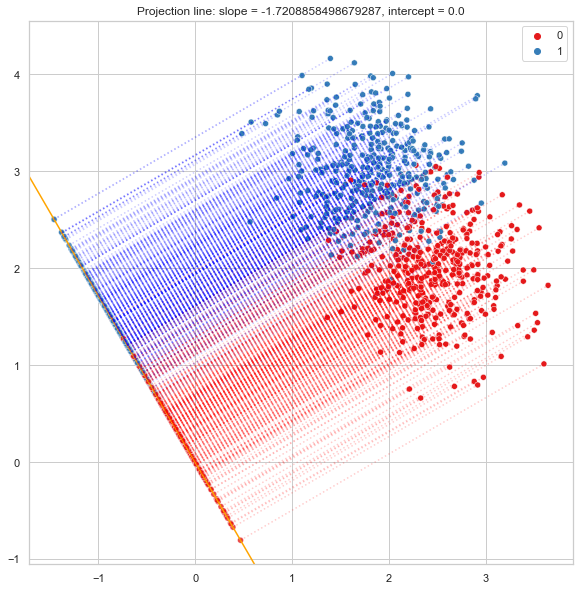

In [23]:
plt.figure(figsize=(10, 10))

# projection line
plt.axline(xy1=(0, intercept), slope=slope, c='orange')
# project train data to the projection line with dashed line
for idx, pj in enumerate(pj_train):
    c = 'b' if y_train[idx] else 'r'
    plt.plot([pj[0], x_train[idx, 0]], [pj[1], x_train[idx, 1]], ls=':', alpha=0.2, c=c)
# projected point on the line
sns.scatterplot(x=pj_train[:, 0], y=pj_train[:, 1], hue=y_train, alpha=0.8, legend=False)
# train data scatter plot
sns.scatterplot(x=x_train[:, 0], y=x_train[:, 1], hue=y_train, alpha=1.0)
plt.title(f'Projection line: slope = {slope}, intercept = {intercept}')
# square the axis
plt.gca().axis('square')
plt.show()